In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import HTML

#  Data Visualization

We will apply some of our discussions around filtering, splitting and so on to build out comparisons between different variables within our dataset. In order to examine why visual data analysis is important lets take a break and take a look at this Ted Talk:

In [2]:
# Youtube
HTML('<center><iframe width="600" height="400" src="https://www.youtube.com/embed/5Zg-C8AAIGg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

Now, take your time and surf the web looking for your best and worst data visualizations and send them to me through slack and we will take time to look through them together and discussion what is wrong.

# Four Basic Methods of Data Visualization

In [3]:
df = pd.read_csv("data/android_adware.csv")

### Dataset Description

The Android Malware Dataset (CICAndMal2017), malware samples in dataset are adware.

* Dowgin family
* Ewind family
* Feiwo family
* Gooligan family
* Kemoge family
* koodous family
* Mobidash family
* Selfmite family
* Shuanet family
* Youmi family

The dataset is based on the captured network traffic features (.pcap files), and extracted more than 80 features by using CICFlowMeter-V3 during three states (installation, before restart, and after restart).

Arash Habibi Lashkari, Andi Fitriah A. Kadir, Laya Taheri, and Ali A. Ghorbani, “Toward Developing a Systematic Approach to Generate Benchmark Android Malware Datasets and Classification”, In the proceedings of the 52nd IEEE International Carnahan Conference on Security Technology (ICCST), Montreal, Quebec, Canada, 2018.

In [4]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.151-31.13.71.1-57050-443-6,31.13.71.1,443,10.42.0.151,57050,6,13/06/2017 03:16:08,15,2,0,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
1,10.42.0.151-31.13.71.1-57050-443-6,10.42.0.151,57050,31.13.71.1,443,6,13/06/2017 03:16:08,10067,3,0,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
2,157.55.130.167-10.42.0.151-40019-50481-6,10.42.0.151,50481,157.55.130.167,40019,6,13/06/2017 03:16:11,45658,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
3,10.42.0.151-52.179.153.195-60517-443-6,10.42.0.151,60517,52.179.153.195,443,6,13/06/2017 03:16:11,50235,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND
4,10.42.0.151-104.46.97.194-54219-443-6,10.42.0.151,54219,104.46.97.194,443,6,13/06/2017 03:16:11,50260,1,1,...,32,0,0,0,0,0,0,0,0,ADWARE_EWIND


Wow! OK, so, we have a column for the network flow on our malware. Let's get to know our data.

In [5]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [6]:
df['Label'].unique()

array(['ADWARE_EWIND', ' Label', 'ADWARE_FEIWO', 'ADWARE_KEMOGE',
       'ADWARE_MOBIDASH', 'ADWARE_KOODOUS', 'ADWARE_DOWGIN',
       'ADWARE_SELFMITE', 'ADWARE_SHUANET', 'ADWARE_GOOLIGAN',
       'ADWARE_YOUMI'], dtype=object)

In [7]:
df['Label'].size

32357

There are four basic methods of data analysis that help us turn numbers into knowledge:

* Comparison
* Composition
* Distribution
* Relationship


## Comparison

Comparison is probably the most common and easy-to-understand method for data analysis. The goal is to use comparison in order to evaluate and compare values between two or more data points. For example, comparison can be used to find the lowest and highest values in the chart.

The most common subset of comparison charts are called <b>trends</b>. Trend charts usually have a time axis and one or several value axes, which are used to show how a data set performed during a specific time period.

Comparisons are typically made with the following goals:
* To compare two or more values side by side to visually grasp the difference
* To list key values to quickly find and read them (i.e., revenue per month)
* To rank several data categories from best to worst or the other way around
* To show pattern recognition by visualing highlighting gaps, spikes, outliers, or trends

The best char types to use for data comparison include:
* column
* bar
* line or time-line

Let's build bar chart to compare the flow duration.

In [8]:
df['Flow Duration'] = pd.to_numeric(df['Flow Duration'], errors='coerce')

[Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND')]

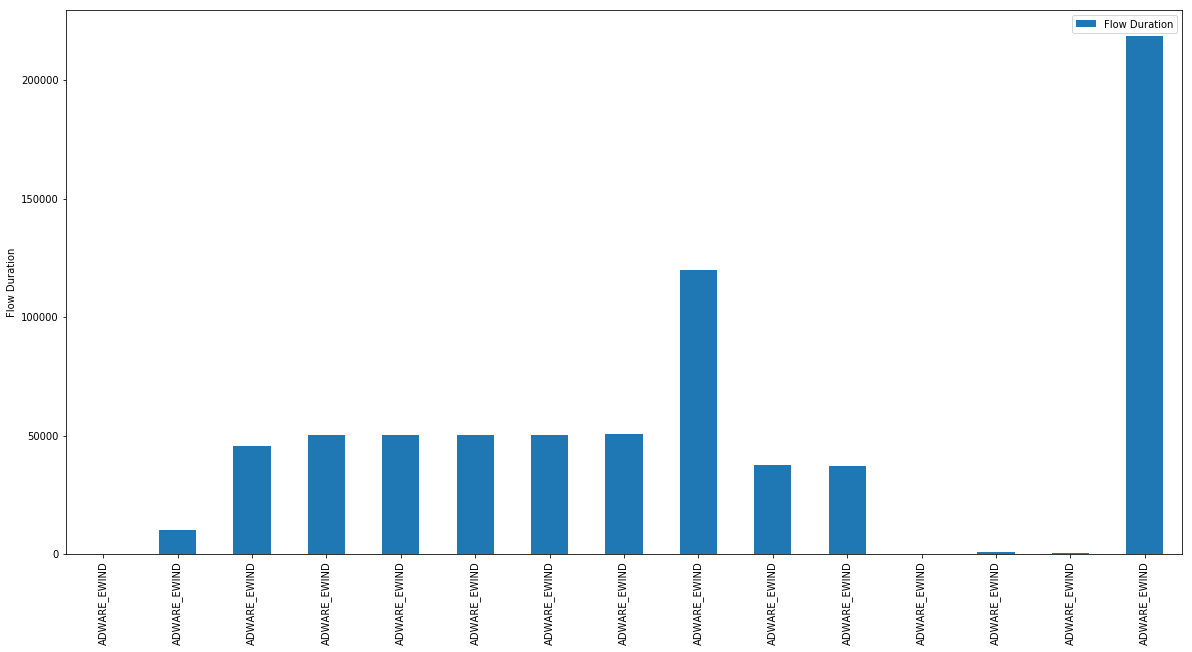

In [9]:
plt.rcParams["figure.figsize"] = [20,10]
ax = df[['Label', 'Flow Duration']].head(15).plot(kind='bar', rot=90)
x_labels = df['Label']
ax.set_ylabel("Flow Duration")
ax.set_xticklabels(x_labels)

We have compared flow rates over malware network traffic captures. Now it is your turn to build your own comparison chart.

## Composition

Composition of data is probably the most misused method in data representation endeavors.

The idea is to show how individual parts make up the whole by combining them together and displaying them as a sum. Composition can also be used to show how a total value can be divided into parts or to highlight the significance of each part relative to the total value.

A typical misuse of this presentation type is done when there are too many parts, too many composition sets, the value differences between parts are too big, or any combination of this.

Use data composition charts to show

* Company market share and a few key players in the market
* Total country population by TOP religions, languages, or ethnical groups
* Total revenue, by TOP product lines, divisions, or regions

Charts typically used for compositions include:

* Stacked bars or columns
* Pie or donut charts
* Stacked area charts
* Waterfall charts

Quite a few people would argue that you should not use pie or donut charts because people are bad at evaluating angles. Some would say that you should avoid stacked area charts and waterfall charts because those are confusing and are often misunderstood.

We will build a composition chart in order to display the composition of packets both forward and backward.

In [10]:
df['Total Fwd Packets'] = pd.to_numeric(df['Total Fwd Packets'], errors='coerce')
df['Total Backward Packets'] = pd.to_numeric(df['Total Backward Packets'], errors='coerce')

[Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND'),
 Text(0, 0, 'ADWARE_EWIND')]

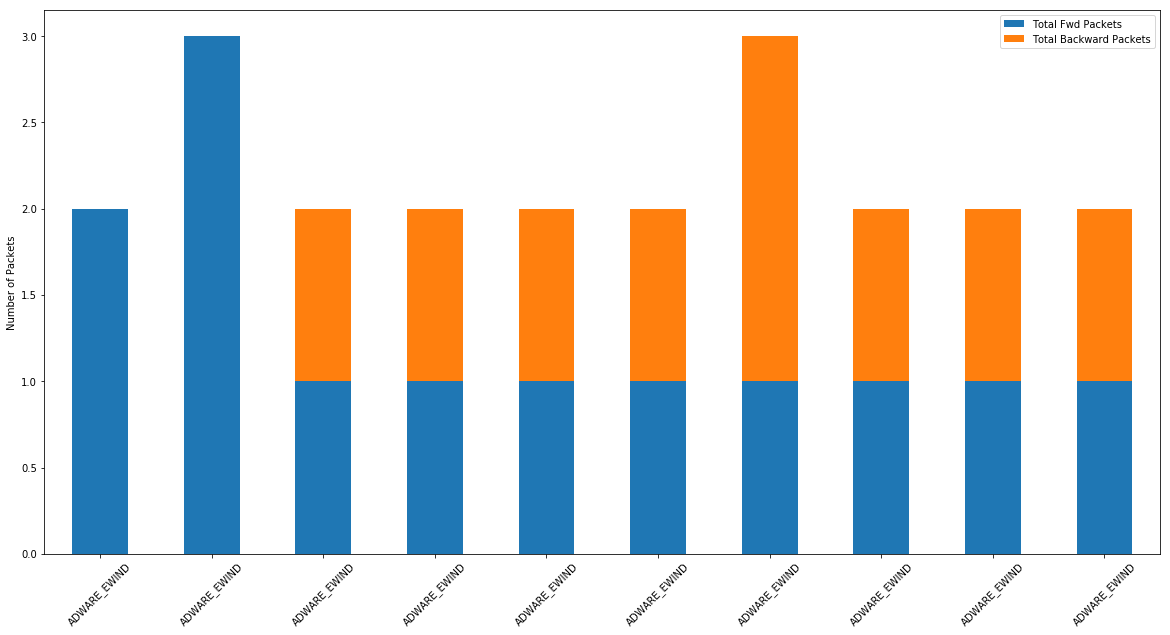

In [11]:
ax = df[['Total Fwd Packets', 'Total Backward Packets']].head(10).plot(kind='bar', stacked=True, rot=45)
x_labels = df['Label']
ax.set_ylabel("Number of Packets")
ax.set_xticklabels(x_labels)

Now, it is your turn to build your own composition chart.

## Distribution

A distribution combines the merits and functionality of both Comparison and Composition. It can help you see the full data spectrum and visualize related or unrelated data points. With distribution you can see if there are any correlations, trends, patterns, shapes, clusters, averages, or outliers.

A very common subset of distribution analysis often used in business reporting is Deviation or Variance analysis. These methods let you see which values deviate from the norm. Understanding deviations from targets, budgets, or growth rates is a common requirement in almost any company.

Use a distribution or deviation visualizations chart to:

* Visualize the distribution of ages in a group of people
* Visualize the correlations between cause and effect
* Spot bugs or constraints in production or quality control systems
* Visualize sales in various stores, to spot best and worst performing ones

Charts typically used for Distribution and Deviation:
* Column and bar histogram charts
* Line and area charts
* Scatter plot charts
* Data tables
* Map charts


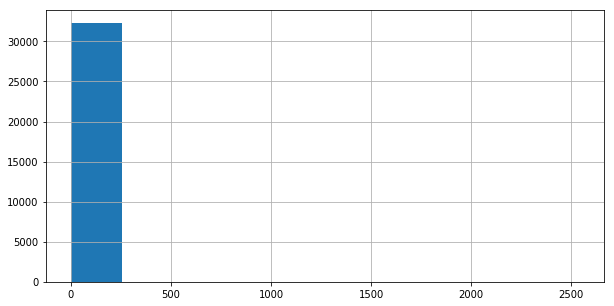

In [12]:
plt.rcParams["figure.figsize"] = [10,5]
df['Total Fwd Packets'].hist()

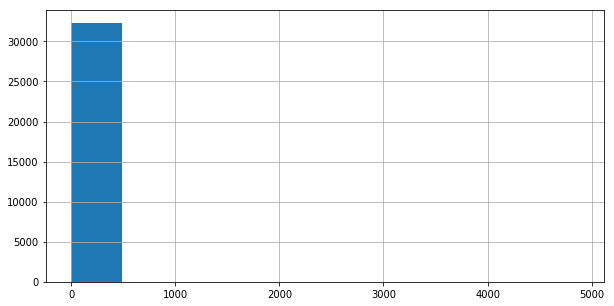

In [13]:
df['Total Backward Packets'].hist()

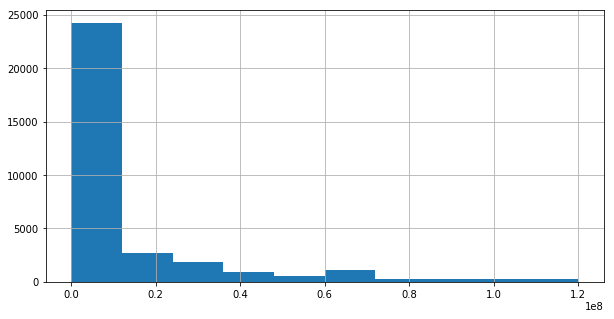

In [14]:
df['Flow Duration'].hist()

Now, it is your turn to build your own distribution chart.

## Relationship

As the name suggests, these types of charts show the relationship, correlation, or connection of two or more variables and their properties.

A good use of relationship graphs would be to demonstrate how something does or does not affect another variable positively or negatively. Somewhat similarly to distribution, you can use data relationships to find correlations, trends, patterns, clusters, averages, or outliers.

Use a relationship chart to:

* Estimate how marketing expenditures affect sales and profit.
* Spot flaws in effectiveness by evaluating expenses vs. income by store or region.
* Answer questions such as, “Does income level depend on IQ?” or “Do top tier business school graduates earn more in their careers?”

Charts typically used for relationship charts:

* Scatter plot (typically with two dimensions)
* Bubble (three to four dimensions, using bubble size and color scale, or five dimensions with animation or layers)
* Line (or lines, with two or more axes)
* Table charts


In [15]:
df['SYN Flag Count'] = pd.to_numeric(df['SYN Flag Count'], errors='coerce')
df['ACK Flag Count'] = pd.to_numeric(df['ACK Flag Count'], errors='coerce')

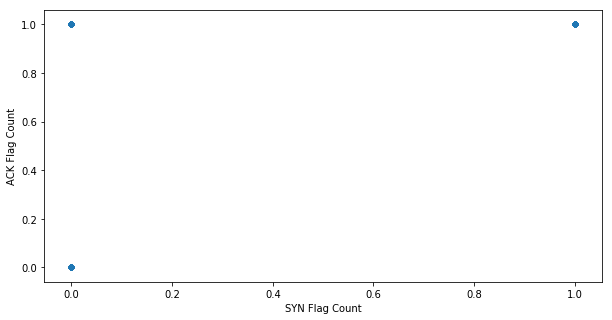

In [17]:
df.plot(kind='scatter', x='SYN Flag Count', y='ACK Flag Count')

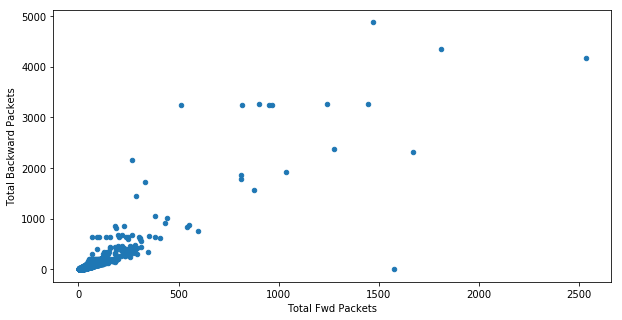

In [18]:
df.plot(kind='scatter', x='Total Fwd Packets', y='Total Backward Packets')

We can learn a lot from each one of these methods, it is our job to understand our goals and do our best to not add bias or miscontrue with the data visualizations.

Now, it is your turn to build your own relationship chart.

These slides/demos are based on concepts from: https://eazybi.com/blog/data_analysis_and_visualization/.

# Principles of Data Visualizations

We begin with some basic ideas about data visualization from Edward Tufte (The Visual Display of Quantitative Information (2nd ed.))

He gives six principles of graphical integrity. The first two are:
1. The representation of numbers, as physically measured on the
surface of the graphic itself, should be directly proportional to
the numerical quantities measured.
2.  Clear, detailed, and thorough labeling should be used to
defeat graphical distortion and ambiguity. Write out
explanations of the data on the graphic itself. Label important
events in the data.

The classic example to avoid: adding 3d where it isn't necessary

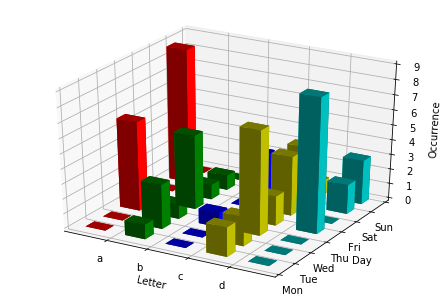

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = np.array([
[0,1,0,2,0],
[0,3,0,2,0],
[6,1,1,7,0],
[0,5,0,2,9],
[0,1,0,4,0],
[9,1,3,4,2],
[0,0,2,1,3],
])

column_names = ['a','b','c','d','e']
row_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig = plt.figure()
ax = Axes3D(fig)

lx= len(data[0])            # Work out matrix dimensions
ly= len(data[:,0])
xpos = np.arange(0,lx,1)    # Set up a mesh of positions
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['r', 'g', 'b', 'y', 'c'] * ly

ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=cs)

#sh()
ax.w_xaxis.set_ticklabels(column_names)
ax.w_yaxis.set_ticklabels(row_names)
ax.set_xlabel('Letter')
ax.set_ylabel('Day')
ax.set_zlabel('Occurrence')

plt.show()

"The Lie Factor" is defined as:

lie factor = size of effect shown in graphic / size of effect in data

When this isn't 1, it is not uncommon to be as large as 2 to 5

It is less usual to see a life factor of less than 1

The third principle of graphical integrity: Show data variation, not design variation

For example, avoid things like this:

<img src="images/OPEC OIL Prices.png">

The fourth principle of graphical integrity: In time-series
displays of money, deflated and standardized units of monetary
measurement are nearly always better than nominal units.

The fifth: The number of information-carrying (variable)
dimensions depicted should not exceed the number of dimensions
in the data


In general it implies that you should not use 3d to
represent something that only needs to be 2d, etc.
Tufte’s sixth principle of graphical integrity is: Graphics must not
quote data out of context.

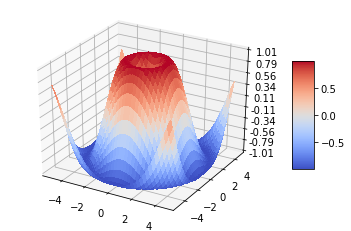

In [20]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

To evaluate the information content, a useful measure is:

    Data ink ratio = data ink / total ink used in the graphic
    
This is the same as: the proportion of a graphic’s ink devoted to
the non-redundant display of data information

It is also the same as: 1 minus the proportion of a graphic that can
be erased without the loss of data information

One of Tufte’s principles for graphical excellence:
Maximize the data ink ratio, within reason.

This is why Tufte frowns on heavy grid lines in the background (or
even horizontal reference lines)

He extends this principle with two guidelines for how to achieve it
1. Erase non-data ink, within reason
2. Erase redundant data ink, within reason

To summarize Tufte’s principles of how to achieve graphical
excellence:
1. Above all else show the data
2. Maximize the data-ink ratio
3. Erase non-data ink
4. Erase redundant data ink
5. Revise and edit

## Chartjunk

A useful term coined by Tufte: “chartjunk refers to all
visual elements in charts and graphs that are not necessary to
comprehend the information represented on the graph, or that
distract the viewer from this information” (quoted from Wikipedia)
Common types of chartjunk:
1. Vibrating chartjunk, which is cross-hatching or other patterns
that distract the mind from the information being presented
2. Grids (according to Tufte) — make them a lighter gray, not
black, if you are going to use them
3. Self-promoting graphics (“The Duck”), where color schemes
and patterns are introduced for artistic appeal rather than
information content.

An example of charjunk is the Spaghetti plot is a line plot with many lines displayed together. The problem is that it is really hard to read, and thus provide few insight about the data.

Text(0, 0.5, 'Score')

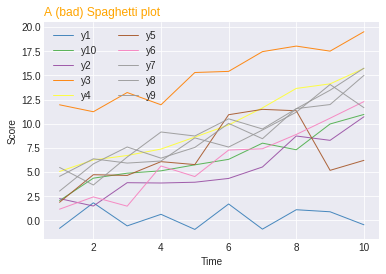

In [21]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


One way to avoid the <b>spaghetti plot</b> is to highlight a group. If you plot many lines, but the actual reason for that is to explain the feature of one particular object compared to the others. Then it is good practice to highlight this group: make it appear different, and give it a proper annotation. As shown in the example below:

Text(0, 0.5, 'Score')

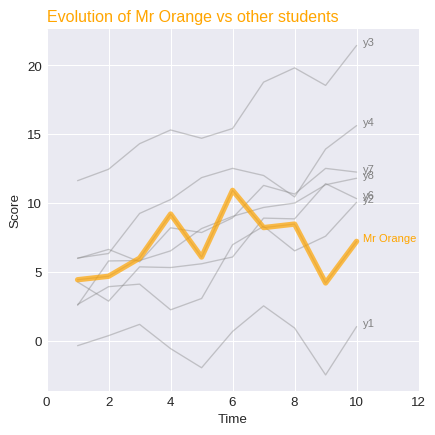

In [22]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
 
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
   num+=1
   name=list(df)[num]
   if name != 'y5':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


Another way to tackle this problem is to use small multiples. If all groups interest you, a good solution would be to split them in separate subplots. As you can see here, the behaviour of each group is much more readable than before.

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.06, 0.5, 'Note')

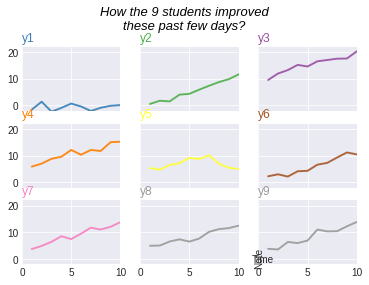

In [23]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

Another example is <b>pie charts</b>. There are a few rare cases where they can be useful, and the general public is used to it. However, it is definitely not the best way to represent data, and is often the theatre of awful data visualization. The point of a pie chart is to show the relationship of parts out of a whole. Pie chart is easily the worst way to convey information ever developed in the history of data visualization. It must be avoided and replaced with barplot most of the time. It is really difficult for a human to make the difference between the size of similar slices.

<b>Overplotting</b> is a common problem in data visualization that occurs when the amount of data is huge. When your dataset is big, dots of your scatterplot tend overlap, and your graphic becomes unreadable. This problem is illustrated by the scatterplot below. A first look might lead to the conclusion that there is <b>no relationship</b> between X and Y.

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  from ipykernel import kernelapp as app


Text(0.0, 1.0, 'Overplotting looks like that:')

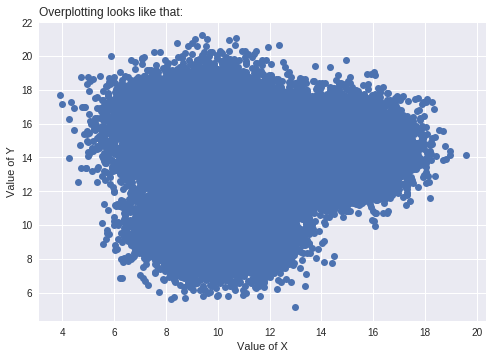

In [31]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')
 
# Dataset:
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='', marker='o')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')

### Below are 10 charts that aid in avoiding overplotting

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0.0, 1.0, 'Overplotting? Try to reduce the dot size')

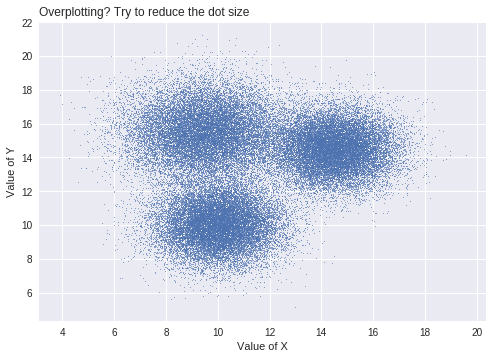

In [32]:
# Plot with small marker size
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


Text(0.0, 1.0, 'Overplotting? Try to use transparency')

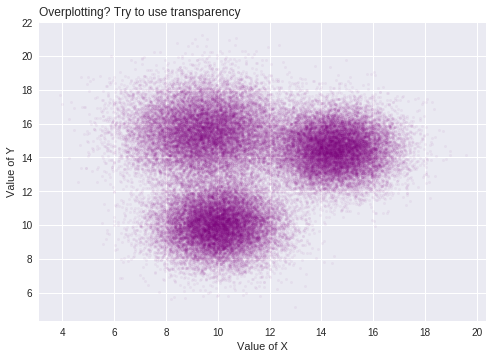

In [33]:
# Plot with transparency
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left')

Text(0.0, 1.0, 'Overplotting? Try 2D density graph')

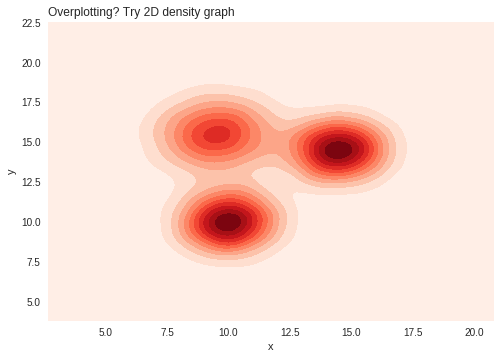

In [34]:
# 2D density plot:
sns.kdeplot(df.x, df.y, cmap="Reds", shade=True)
plt.title('Overplotting? Try 2D density graph', loc='left')

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


Text(0.0, 1.0, 'Overplotting? Sample your data')

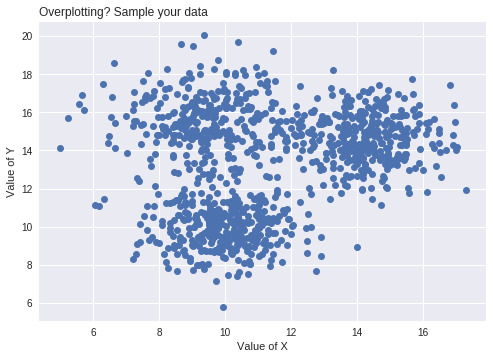

In [35]:
# Sample 1000 random lines
df_sample=df.sample(1000)
 
# Make the plot with this subset
plt.plot( 'x', 'y', data=df_sample, linestyle='', marker='o')
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Sample your data', loc='left')

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys


Text(0.0, 1.0, 'Overplotting? Show a specific group')

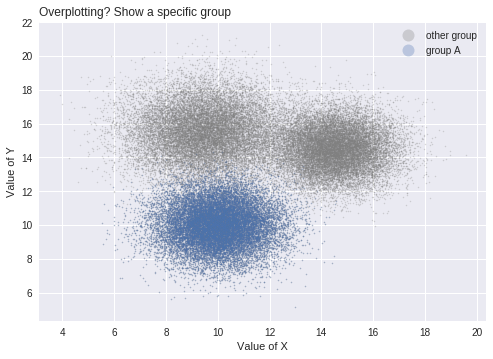

In [36]:
# Filter the data randomly
df_filtered = df[ df['group'] == 'A']
# Plot the whole dataset
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=1.5, color="grey", alpha=0.3, label='other group')
 
# Add the group to study
plt.plot( 'x', 'y', data=df_filtered, linestyle='', marker='o', markersize=1.5, alpha=0.3, label='group A')
 
# Add titles and legend
plt.legend(markerscale=8)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Show a specific group', loc='left')

Text(0.0, 1.0, 'Overplotting? Show putative structure')

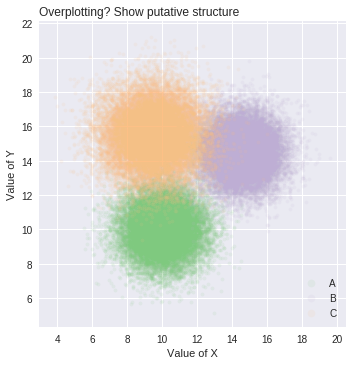

In [37]:
# Plot
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='group', legend=False, palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Show putative structure', loc='left')

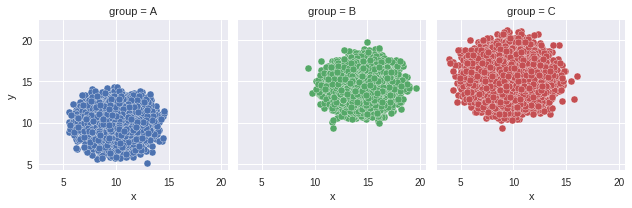

In [38]:
# Use seaborn for easy faceting
g = sns.FacetGrid(df, col="group", hue="group")
g = (g.map(plt.scatter, "x", "y", edgecolor="w"))

/home/avengers/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


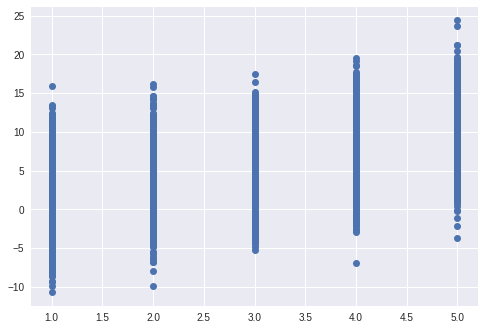

In [39]:
# Dataset:
a=np.concatenate([np.random.normal(2, 4, 1000), np.random.normal(4, 4, 1000), np.random.normal(1, 2, 500), np.random.normal(10, 2, 500), np.random.normal(8, 4, 1000), np.random.normal(10, 4, 1000)])
df=pd.DataFrame({'x': np.repeat( range(1,6), 1000), 'y': a })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='', marker='o')

Text(0.0, 1.0, 'Overplotting? Use jitter when x data are not really continuous')

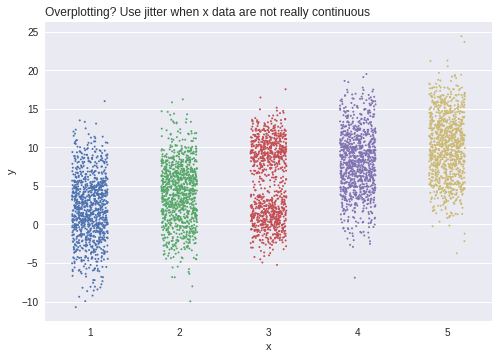

In [40]:
# A scatterplot with jitter
sns.stripplot(df.x, df.y, jitter=0.2, size=2)
plt.title('Overplotting? Use jitter when x data are not really continuous', loc='left')

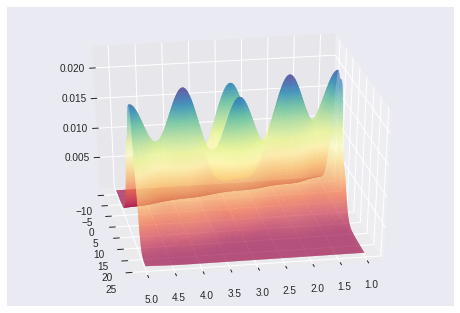

In [41]:
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([df.x,df.y])
xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)

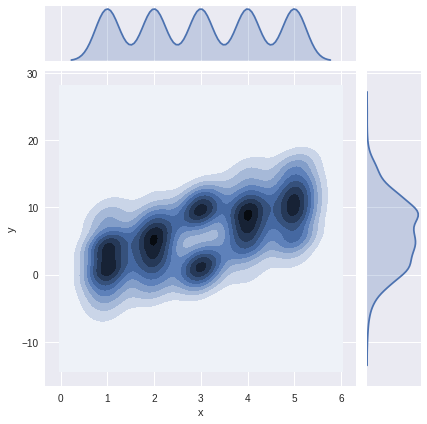

In [42]:
# 2D density + marginal distribution:
sns.jointplot(x=df.x, y=df.y, kind='kde')

A boxplot summarizes the distribution of a numeric variable for several groups. The problem is than summarizing also means loosing information and that can become a mistake. If we consider the boxplot below, it is easy to conclude that group C has  a higher value than the others. HOwever, we cannot see what is the underlying distribution of dots into each group, neither the number of observation for each.

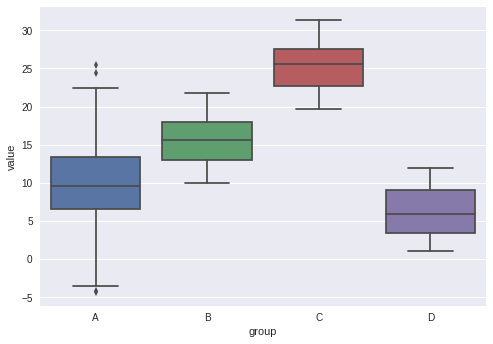

In [43]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
sns.boxplot(x='group', y='value', data=df)


Text(0.0, 1.0, 'Boxplot with jitter')

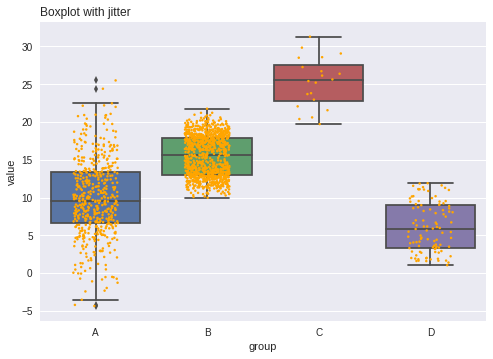

In [44]:
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

Text(0.0, 1.0, 'Violin plot')

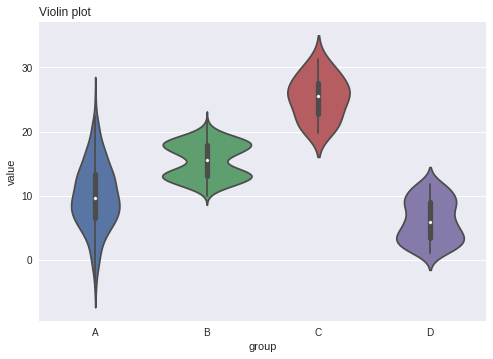

In [45]:
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")

Text(0.0, 1.0, 'Boxplot with number of observation')

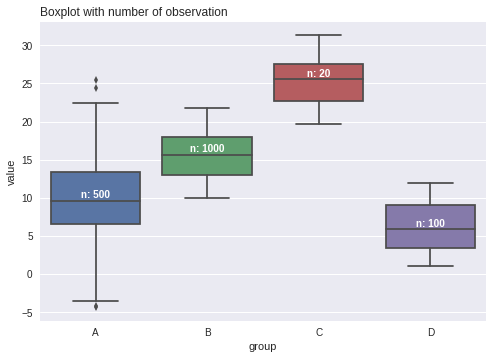

In [46]:
# Start with a basic boxplot
sns.boxplot(x="group", y="value", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['group'])['value'].median().values
nobs = df.groupby("group").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')
 
# add title
plt.title("Boxplot with number of observation", loc="left")

Tufte gives one other useful pair of principles on the aspect ratio of
a display:
* If the nature of the data suggests the shape of the graphic, follow that suggestion
* Otherwise, move toward horizontal graphics about 50 percent wider than tall (approximately a 3:2 aspect ratio)

We now describe some principles given by William S. Cleveland in
his book The Elements of Graphing Data (1985)
Many (but not all) of these are quite similar to those of Tufte,
although his work in this area preceded Tufte’s work
His four major categories in the principles of graph construction:
* Clear vision
* Clear understanding
* Scales
* General strategy

### Clear vision
* Make the data stand out. Avoid superfluidity
* Use visually prominent graphical elements to show the data
* Do not clutter the data region
* Use a reference line when there is an important value that must be seen across the entire graph, but do not let the line interfere with the data
* Do not allow data labels in the data region to interfere with the quantitative data or to clutter the graph
* Avoid putting notes, keys, and markers in the data region. Put keys and markers just outside the data region and put notes in the legend or in the text
* Overlapping plotting symbols must be visually distinguishable
* Superposed data sets must be readily visually discriminated
* Visual clarity must be preserved under reduction and reproduction
* Avoid putting notes, keys, and markers in the data region
* Put keys and markers just outside the data region and put notes in the legend or in the text
* Overlapping plotting symbols must be visually distinguishable
* Superposed data sets must be readily visually discriminated
* Visual clarity must be preserved under reduction and reproduction

### Clear Understanding
* Put major conclusions into graphical form. Make legends comprehensive and informative
* Error bars should be clearly explained
* Proofread graphs
* Strive for clarity

### General Strategy
* A large amount of quantitative information can be packed into a small region
* Graphing data should be an interative, experimental process
* Graph data two or more times when it is needed
* Many useful graphs require careful, detailed study

These slides/demos are based on slides from: http://stat.pugetsound.edu/courses/class13/dataVisualization.pdf, and https://python-graph-gallery.com/bad-chart/.